In [8]:
#############    #############
##########          ##########
#######                #######
####                      ####
#                            # 
# Compiled by Hassan Murtaza #
#                            #
####                      ####
#######                #######
##########          ##########
#############    ############# 

## Intro to Reinforcement Learning

Reinforcement Learning is a subfield of machine learning that teaches an agent how to choose an action from its action space, within a particular environment, in order to maximize rewards over time.



### Core Components

Reinforcement Learning has four essential elements:

**Agent**. The program you train, with the aim of doing a job you specify.

**Environment**. The world, real or virtual, in which the agent performs actions.

**Action**. A move made by the agent, which causes a status change in the environment.

**Rewards**. The evaluation of an action, which can be positive or negative.

### Real World Example

**Determining the Placement of Ads on a Web Page**

**Agent:** The program making decisions on how many ads are appropriate for a page.

**Environment:** The web page.

**Action:** One of three: (1) putting another ad on the page; (2) dropping an ad from the page; (3) neither adding nor removing.

**Reward:** Positive when revenue increases; negative when revenue drops.


In this scenario, the agent observes the environment and gets its current status. The status can be how many ads there are on the web page and whether or not there is room for more.

The agent then chooses which of the three actions to take at each step. if programmed to get positive rewards whenever the revenue increase, and negative rewards whenever revenue falls, it can develop its effective policy.

### Difference between RL and supervised learning/ unsupervised learning

**Static vs Dynamic:** SU/US needs data to train on and give decisions, training on data is look like a static fashion. While RL has dynamic nature, it acts according to nature

**No explicit right answer:** SU has labels while RL don't.  

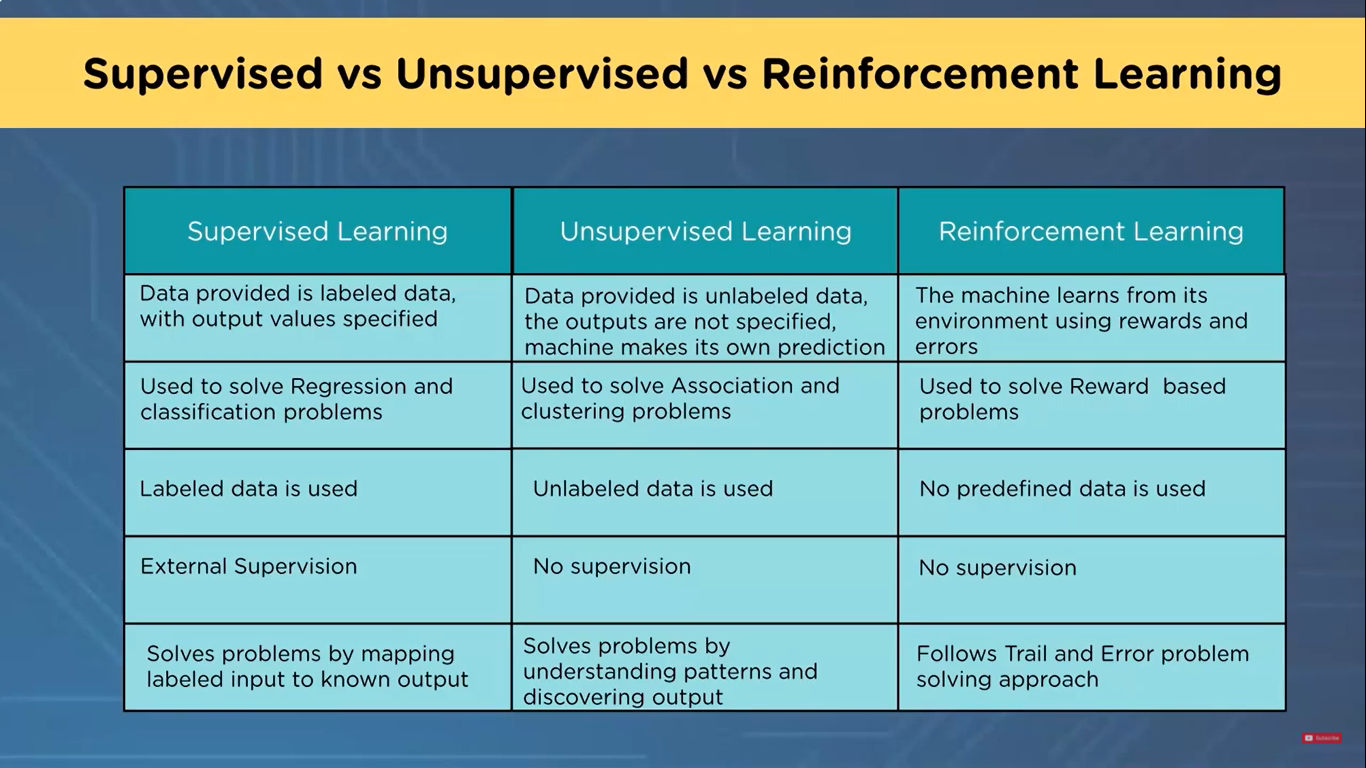

### References
[Introduction to RL: Part 1](https://medium.com/ai%C2%B3-theory-practice-business/reinforcement-learning-part-1-a-brief-introduction-a53a849771cf)

[Introduction to RL SimpliLearn](https://www.simplilearn.com/tutorials/machine-learning-tutorial/reinforcement-learning?source=sl_frs_nav_playlist_video_clicked)

## Introduction to Markov Decision Process

### Stochastic Process, Markov Process, Markov Chain


**Stochastic Process**
In the sequence of outcomes, the Possiblity of outcome is based on chance.

**Markov Process**
It is a stochastic process where


1.   Outcomes are finite
2.   The probability of next outcome is only depends on the outcome before
3.   The probabilities are constant overtime

**Markov chain** is the sequence of state vectors. For more understanding please see the [introduction to markov process and markov chain](https://www.youtube.com/watch?v=qK-PUTuUSpw)



### Markov Decision Process

Recall our discussion of the Markov Chain, which works with S, a set of states, and P, the probability of transitioning from one to the next. It also uses the Markov Property, meaning each state depends only on the one immediately prior to it.

Now, the Markov Decision Process differs from the Markov Chain in that it brings actions into play. This means the next state is related not only to the current state itself but also to the actions taken in the current state. Moreover, in MDP, some actions that correspond to a state can return rewards.

### Example of MDP

**Problem**: A young man by the name of Adam make sequential decisions to earn the greatest possible amount of money.

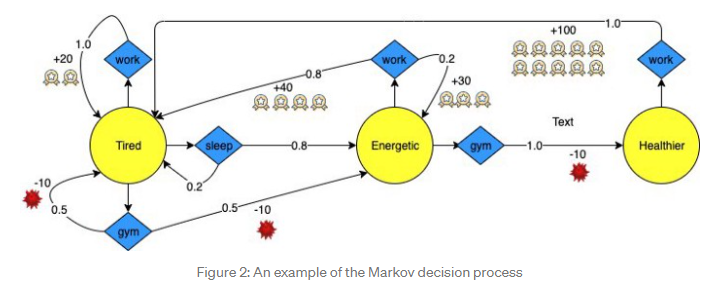




Explanation of MDP Tuple is below

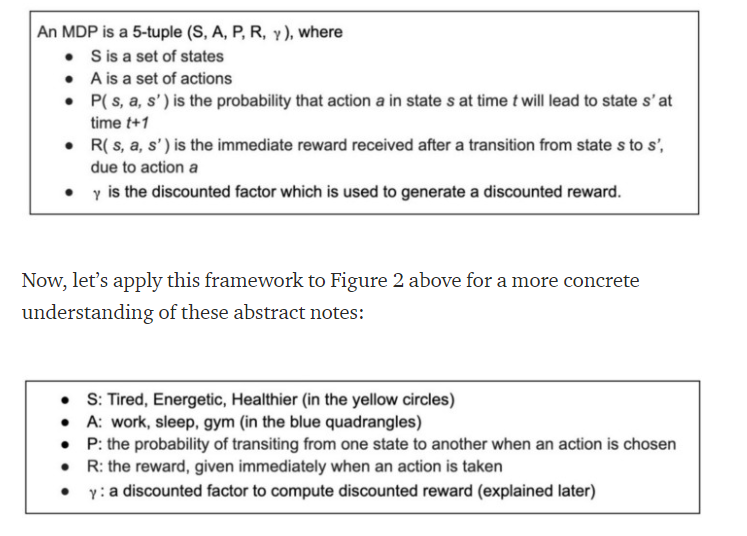

**▶️ MDP in Action: Learning with Adam**

We can make this even easier to grasp with a story, using Adam as our example. As we know, this hard-working young man wants to make as much money as he can. Using the framework defined above, we can help him do just that.

▶️ When Adam’s state is Tired, he can choose one of three 
actions: (1) continue working, (2) go to the gym, and (3) get some sleep.

If he chooses to work, he remains in the Tired state with the certainty of getting a +20 reward. if he chooses to sleep, he has 80% of moving to the next state, Energetic, and a 20% chance of staying Tired.

If he doesn’t want to sleep, he may go to the gym and do a workout. This gives him a 50% chance of entering the Energetic state and a 50% chance of staying Tired. However, he needs to pay for the gym, so this choice results in a -10 reward.

▶️ When Adam becomes Energetic, he can go back to work and be more efficient. From there, he has an 80% chance of getting Tired again (with a +40 reward), and a 20% chance of staying Energetic (with a +30 reward).

Sometimes, when he is Energetic, he wants to do a workout. When he exercises in this state, he has a good time and gets 100% getting Healthier. Of course, he needs to pay for it with a -10 reward.

▶️ Once he arrives at the state Healthier, there is only one thing on his mind: earn more money by doing more work. Because he is in such a good state, he works at peak efficiency, earns a +100 reward, and keeps working until he gets tired again.

With the above information, we can train an agent aimed at helping Adam find the best policy to maximize his rewards over time. This agent will undertake a Markov Decision Process.

However, before we can do that, we need to know how to compute the cumulative reward when an action is taken in one state. That is to say, we must be able to estimate the state value.

### References

[Markov Process](https://medium.com/ai%C2%B3-theory-practice-business/reinforcement-learning-part-2-introducing-markov-process-d3586d4003e0)

[Markov Process MIT](https://www.youtube.com/watch?v=K-ck5dOsPgQ)

[Example MP](https://www.youtube.com/watch?v=VCyJGp6Enxg)

## Optimal Policy Search with MDP

###  Previous Understanding

Now that we understand MDP, we can think of it as the environment in which an agent works. To maximize rewards over time, this agent needs to find an optimal policy. That is, it must determine the best action to take at each state.

**⏩ optimal policy:** the best action to take at each state, for maximum rewards over time

To help our agent do this, we need two things:
1. A way to determine the value of a state in MDP.
2. An estimated value of an action taken at a particular state.

### Bellman Optimality Equation

Bellman equation is basically an estimation. It give optimal value of each state. In other words, it estimates the value of a state by computing the expected rewards that the state can generate.  


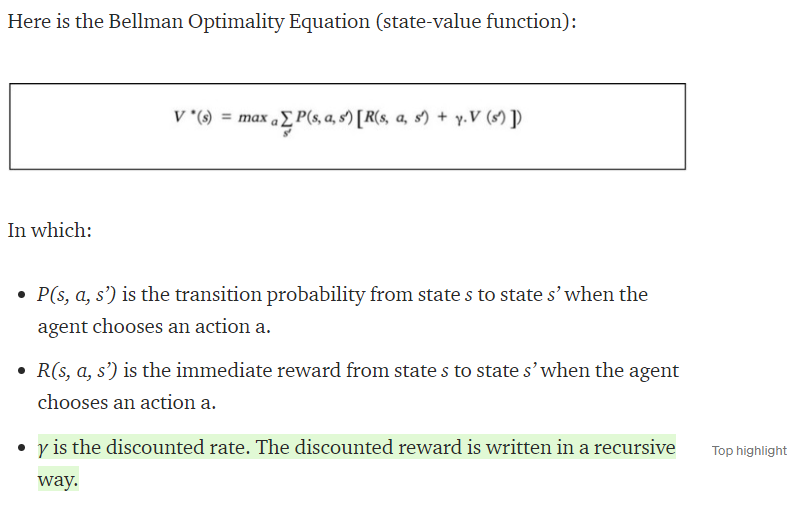

### Q-Value Iteration Algorithm

The optimal state value alone doesn’t tell the agent which action to take in each state. Fortunately — Inspired by the above concept of optimal state value — Bellman provides us with a similar formula to estimate the value of state-action pairs, named Q-Value.

**⏩ Q-Value**: estimated value of action a taken at state s; noted as Q*(s, a)
The Q-Value explicitly tells the agent which action should be chosen at each state, according to the Q-Value score.

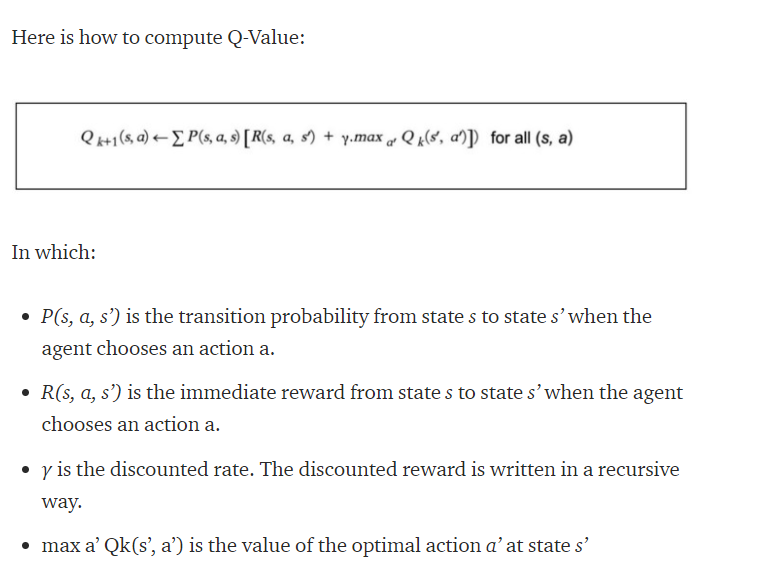

### Implementation

In [4]:
# Let us take the example that is described above and build an environment of it
import numpy as np

nan = np.nan

# Action Space
actions = [[0, 1, 2], [0, 2], [0]]

# Transition probability
P = np.array([
[[1.0, 0.0, 0.0], [0.2, 0.8, 0.0], [0.5, 0.5, 0.0]],
[[0.8, 0.2, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]],
[[1.0, 0.0, 0.0], [nan, nan, nan], [nan, nan, nan]],
])

# Immediate reward transition state  
R = np.array([
[[20., 0.0, 0.0], [0.0, 0.0, 0.0], [-10., -10., 0.0]],
[[40., 30., 0.0], [nan, nan, nan], [0.0, 0.0, -10.]],
[[70., 0.0, 0.0], [nan, nan, nan], [nan, nan, nan]],
])

print("Transition Probability Shape", P.shape)
print("Immediate Reward Shape", R.shape)

Transition Probability Shape (3, 3, 3)
Immediate Reward Shape (3, 3, 3)


In [6]:
# Lets implement Q-Value Algorithm

Q = np.full((3, 3), -np.inf)
for s, a in enumerate(actions):
    Q[s, a] = 0.0
 
discount_factor = 0.99 # Its gamma. if near to Zero agent estimate reward based on current state # Vice virsa for future
iterations = 10
for i in range(iterations):
    Q_previous = Q.copy()
    for s in range(len(P)):
        for a in actions[s]:
            sum_v = 0
            for s_next in range(len(P)):
                sum_v += P[s, a, s_next] * (R[s, a, s_next] +
                          discount_factor * np.max(Q_previous[s_next]))
            Q[s, a] = sum_v
print(Q)

[[191.23584998 189.01140277 172.34557047]
 [213.67973818         -inf 210.73584998]
 [241.23584998         -inf         -inf]]


These rows represent states, while the columns represent actions and the numbers represent the rewards of action a at state s.

**Results:**

Here is what the demo tells us: The best course of action when Adam feels tired is to go get some sleep, then go to the gym and do a workout so he can be healthier, then go to work at peak efficiency.

### References
[Optimal Policy Search with MDP](https://medium.com/ai%C2%B3-theory-practice-business/reinforcement-learning-part-4-optimal-policy-search-with-mdp-7fc96158ea8a)

## Monte-Carlo and Temporal Difference Learning




**Background**

As it is understood that MDP works with known environment problem. For example, if we don't have the knowledge about full probability transition of the environment then we are unable find the optimal state by using bellman optimality equation. And in the real world its is lesslikely to have known environment, therefore, Mont Carlo method come into play

it’s important to note that MDP only works with a known model, in which all five tuples are evident.

In this case, our agent must learn from the environment by interacting with it and collecting experiences, or samples. In doing so, the agent carries out strategy evaluation and iteration and can obtain the optimal strategy.
Since the theory to support this approach comes from the Monte-Carlo method, let’s start by discussing Monte Carlo learning.



### Monte-Carlo Explanation 

the Monte-Carlo method involves letting an agent learn from the environment by interacting with it and collecting samples. This is equivalent to sampling from the probability distribution P(s, a, s’) and R(s, a).

However, Monte-Carlo (MC) estimation is only for trial-based learning. In other words, an MDP without the P tuple can learn by trial-and-error, through many repetitions.

It has methematical details which think for learning should visit the [page](https://medium.com/ai%C2%B3-theory-practice-business/reinforcement-learning-part-5-monte-carlo-and-temporal-difference-learning-889053aba07d) itself 

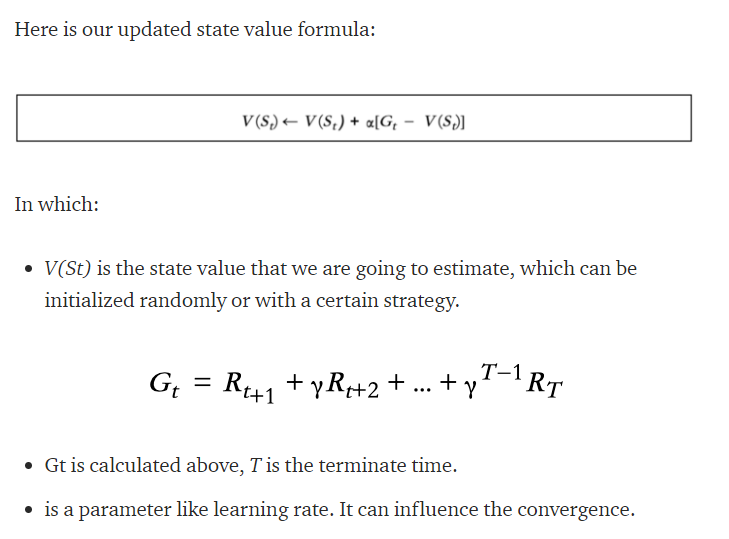

### Temporal Difference Learning

The Monte-Carlo reinforcement learning algorithm overcomes the difficulty of strategy estimation caused by an unknown model. However, a disadvantage is that the strategy can only be updated after the whole episode.

In other words, the Monte Carlo method does not make full use of the MDP learning task structure. Luckily, that’s where the more efficient Temporal-Difference (TD) method comes in, making full use of the MDP structure.



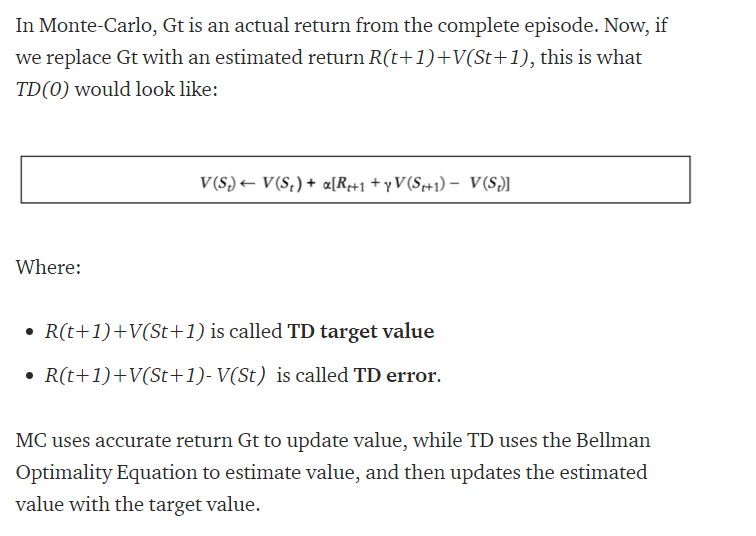

## Q-Learning

### Example: How Q-Learning Works
Let’s try to understand this better with an example:
You’re having dinner with friends at an Italian restaurant and, because you’ve been here once or twice before, they want you to order. From experience, you know that the Margherita pizza and pasta Bolognese are delicious. So if you have to order ten dishes, experience might tell you to order five of each. But what about everything else on the menu?

In this scenario, you are like our “agent”, tasked with finding the best combination of ten dishes. Imagine this becomes a weekly dinner; you’d probably start bringing a notebook to record information about each dish. In Q-learning, the agent collects Q-values in a Q-table. For the restaurant menu, you could think of these values as a score for each dish.

Now let’s say your party is back at the restaurant for the third time. You’ve got a bit of information in your notebook now but you certainly haven’t explored the whole menu yet. How do you decide how many dishes to order from your notes — which you know are good, and how many new ones to try?

This is where ε-greedy comes into play.

### ebsilon-greedy policy

In the above example, what happened in the restaurant is like our MDP (Markov Decision Process) and you, as our “agent” can only succeed in finding the best combination of dishes for your party if you explore it thoroughly enough.
So it is with Q-Learning: it can work only if the agent explores the MDP thoroughly enough. Of course, this would take an extremely long time. Can you imagine how many times you’d have to go back to the restaurant to try every dish on the menu in every combination?

This is why Q-learning uses the ε-greedy policy, which is ε degree “greedy” for the highest Q values and 1 — ε degree “greedy” for random exploration.

In the initial stages of training an agent, a random exploration environment (i.e. trying new things on the menu) is often better than a fixed behavior mode (i.e. ordering what you already know is good) because this is when the agent accumulates experience and fills up the Q-table.
Thus, it’s common to start with a high value for ε, such as 1.0. This means the agent will spend 100% of its time exploring (e.g. using a random policy) instead of referring to the Q-table.

From there, the value of ε can be gradually decreased, making the agent more greedy for Q-values. For example, if we drop ε to 0.9, it means the agent will spend 90% of its time choosing the best strategy based on Q-table, and 10% of its time exploring the unknown.

The advantage of the ε-greedy policy, compared to a completely greedy one, is that it always keeps testing unknown regions of the MDP. Even when the target policy seems optimal, the algorithm never stops exploring: it just keeps getting better and better.

There are various functions for exploration, and many defined exploration policies can be found online. Do note that not all exploration policies are expected to work for both discrete and continuous action spaces.

### Q-Learning Implementation



In [ ]:
import numpy as np

# Q
q = np.matrix(np.zeros([6, 6]))
# Reward
r = np.matrix( [[-1, -1, -1, -1,  0,  -1],
                [-1, -1, -1,  0, -1, 100],
                [-1, -1, -1,  0, -1,  -1],
                [-1,  0,  0, -1,  0,  -1],
                [ 0, -1, -1,  0, -1, 100],
                [-1,  0, -1, -1,  0, 100]])
gamma = 0.8
epsilon = 0.4

# the main training loop
for episode in range(101):

  # random initial state
  state = np.random.randint(0, 6)

  # if not final state
  while (state != 5):
  
    # choose a possible action
    # Even in random case, we cannot choose actions whose r[state, action] = -1.
  
    possible_actions = []
    possible_q = []
  
    for action in range(6):
  
      if r[state, action] >= 0:
        possible_actions.append(action)
        possible_q.append(q[state, action])
  
    # Step next state, here we use epsilon-greedy algorithm.
    action = -1
    
    if np.random.random() < epsilon:
      
      # choose random action
      action = possible_actions[np.random.randint(0, len(possible_actions))]
    else:

      # greedy
      action = possible_actions[np.argmax(possible_q)]
    
    # Update Q value
    q[state, action] = r[state, action] + gamma * q[action].max()
    
    # Go to the next state
    state = action
  
  # Display training progress
  if episode % 10 == 0:
    print("------------------------------------------------")
    print("Training episode: %d" % episode)
    print(q)

### Reference:

[Blog Post](https://medium.com/ai%C2%B3-theory-practice-business/reinforcement-learning-part-6-td-%CE%BB-q-learning-99cdfdf4e76a)

[What Is Q-Learning: The Best Guide To Understand Q-Learning](https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning)

## Introduction to Deep Q Networks

## Miscellaneous details

### Discounted Reward

It is the agent to look into the future while simultaneously collecting current rewards.

**Scenario**

In Adam’s example above, future rewards are as important as current rewards. But in the CartPole game, surviving in the present is more important than anything else.
Because future rewards can be valued differently depending on the scenario, we need a mechanism to discount the importance of future rewards at different time steps.

**Take aways**
Consider the information above. If the discount rate is close to 0, future rewards won’t count for much in comparison to immediate rewards. In contrast, if the discount rate is close to 1, rewards that are far in the future will be almost as important as immediate rewards.